# Natural langage processing

Nous utilisons des méthodes de NLP et d'analyse textuelle, spécifiquement appliquées aux intitulés de postes issus du scraping de la région du Grand Est.

## Statistique basique

In [23]:
from collections import Counter
import re
from nltk.corpus import stopwords
import nltk
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from sklearn.pipeline import make_pipeline

In [7]:
df_GrandEst = pd.read_csv('S:/Desktop/Python/data_GrandEst.csv')

L'opération ici consiste à procéder au nettoyage et à la tokenisation des données textuelles, ainsi qu'à l'application de stopwords pour affiner l'analyse.

In [8]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Sihao\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [9]:
def clean_text(text):
    text = text.lower()  # Mettre en minuscule
    text = re.sub(r'\W', ' ', text)  # Supprimer les caractères non alphanumériques
    text = re.sub(r'\s+', ' ', text)  # Supprimer les espaces supplémentaires
    return text

In [10]:
df_GrandEst['titre_nettoye'] = df_GrandEst['titre'].apply(clean_text)

In [11]:
french_stopwords = set(stopwords.words('french'))
df_GrandEst['titre_nettoye'] = df_GrandEst['titre_nettoye'].apply(lambda x: ' '.join([word for word in x.split() if word not in french_stopwords]))

In [12]:
word_freq = Counter(" ".join(df_GrandEst['titre_nettoye']).split()).most_common(20)

word_freq

[('f', 2467),
 ('h', 2465),
 ('e', 586),
 ('agent', 571),
 ('chargé', 395),
 ('assistant', 319),
 ('chef', 307),
 ('mairie', 278),
 ('responsable', 273),
 ('service', 247),
 ('adjoint', 210),
 ('polyvalent', 199),
 ('gestionnaire', 198),
 ('infirmier', 190),
 ('grand', 176),
 ('technicien', 173),
 ('administratif', 168),
 ('mission', 161),
 ('conseil', 132),
 ('gestion', 130)]

In [13]:
#On veut retirer h et f 
homme_femme = ['h', 'f', 'e']
french_stopwords = set(stopwords.words('french'))
df_GrandEst['titre_nettoye'] = df_GrandEst['titre_nettoye'].apply(lambda x: ' '.join([word for word in x.split() if word not in french_stopwords and word not in homme_femme]))

In [14]:
word_freq = Counter(" ".join(df_GrandEst['titre_nettoye']).split()).most_common(20)

word_freq

[('agent', 571),
 ('chargé', 395),
 ('assistant', 319),
 ('chef', 307),
 ('mairie', 278),
 ('responsable', 273),
 ('service', 247),
 ('adjoint', 210),
 ('polyvalent', 199),
 ('gestionnaire', 198),
 ('infirmier', 190),
 ('grand', 176),
 ('technicien', 173),
 ('administratif', 168),
 ('mission', 161),
 ('conseil', 132),
 ('gestion', 130),
 ('com', 130),
 ('social', 119),
 ('departemental', 114)]

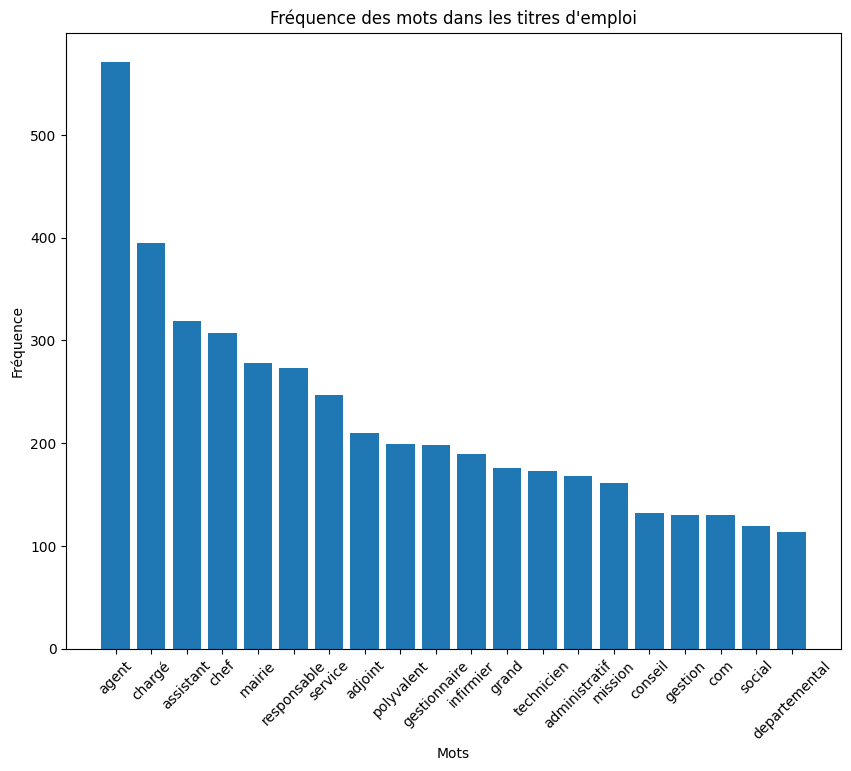

In [15]:
words, counts = zip(*word_freq)

plt.figure(figsize=(10, 8))
plt.bar(words, counts)
plt.xlabel('Mots')
plt.ylabel('Fréquence')
plt.xticks(rotation=45)
plt.title('Fréquence des mots dans les titres d\'emploi')
plt.show()

In [16]:
#On va faire un nuage de mots 
from wordcloud import WordCloud

In [17]:
nuage = ' '.join(df_GrandEst['titre_nettoye'])

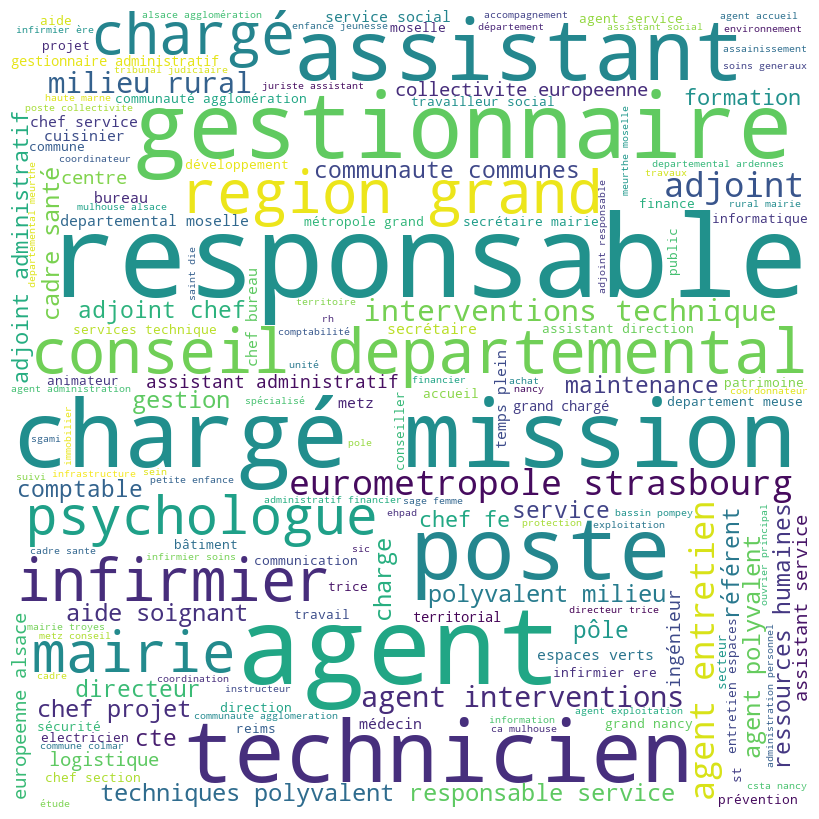

In [18]:
nuage_mot = WordCloud(width = 800, height = 800, 
                      background_color ='white', 
                      min_font_size = 10).generate(nuage)

plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(nuage_mot) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

## Topic modelling

In [19]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np

In [20]:
vector_GrandEst = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')
df_GrandEst_vectorized = vector_GrandEst.fit_transform(df_GrandEst['titre_nettoye'])

In [21]:
n_topics = 10

In [22]:
# Création et ajustement du modèle LDA
lda = LatentDirichletAllocation(n_components=n_topics, random_state=0)
lda.fit(df_GrandEst_vectorized)

# Fonction pour afficher les mots clés de chaque sujet
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print(f"Topic {topic_idx}:")
        print(" ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))

no_top_words = 8
display_topics(lda, vector_GrandEst.get_feature_names_out(), no_top_words)

Topic 0:
infirmier ere soins chef bureau forestier 54 atelier
Topic 1:
cadre santé com administration agent mecanicien personnel cte
Topic 2:
chef cuisinier animateur projet section agent adjoint postes
Topic 3:
chargé mission assistant direction mairie grand troyes métropole
Topic 4:
service social espaces technicien assistant verts temps recherche
Topic 5:
polyvalent secrétaire agent mairie departemental conseil techniques interventions
Topic 6:
alsace poste collectivite europeenne assistant mulhouse ca 68
Topic 7:
gestionnaire strasbourg eurometropole ressources humaines financier administratif comptable
Topic 8:
adjoint administratif agent responsable entretien logistique ingénieur services
Topic 9:
psychologue aide soignant chef cuisine superieur classe agent


Résumé du topic modelling : 
- Topic 0 : Postes liés à la santé des enfants et à l'environnement
- Topic 1 : Gestion des services de santé et l'administration générale
- Topic 2 : Administration et de gestion
- Topic 3 : Gestion dans les administrations locales
- Topic 4 : Assistance sociale et l'entretien des espaces verts
- Topic 5 : Administration publique
- Topic 6 : Europe et fonction publique
- Topic 7 : Gestion financière, des ressources humaines et comptabilité
- Topic 8 : Postes administratifs et de maintenance
- Topic 9 : Santé et restauration

In [75]:
#Visualisation du topic modelling a
import pyLDAvis.lda_model

pyLDAvis.enable_notebook()

panel = pyLDAvis.lda_model.prepare(lda, df_GrandEst_vectorized, vector_GrandEst, mds='tsne')
pyLDAvis.display(panel)

## Modèle d'apprentissage automatique

Dans le cadre de l'analyse des offres d'emploi au sein de la Fonction Publique, nous nous intéressons à la mise au point d'une méthodologie prédictive visant à déterminer à quelle catégorie spécifique de la Fonction Publique - qu'elle soit d'État, hospitalière ou territoriale - une offre d'emploi donnée se rattache.

In [24]:
X = df_GrandEst['titre_nettoye'] 
y = df_GrandEst['type']        
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [25]:
model = make_pipeline(
    TfidfVectorizer(stop_words=stopwords.words('french')),
    MultinomialNB()
)

In [26]:
model.fit(X_train, y_train)

Pipeline(steps=[('tfidfvectorizer',
                 TfidfVectorizer(stop_words=['au', 'aux', 'avec', 'ce', 'ces',
                                             'dans', 'de', 'des', 'du', 'elle',
                                             'en', 'et', 'eux', 'il', 'ils',
                                             'je', 'la', 'le', 'les', 'leur',
                                             'lui', 'ma', 'mais', 'me', 'même',
                                             'mes', 'moi', 'mon', 'ne', 'nos', ...])),
                ('multinomialnb', MultinomialNB())])

In [27]:
predictions = model.predict(X_test)
print(classification_report(y_test, predictions))

                                precision    recall  f1-score   support

Fonction publique Hospitalière       0.92      0.77      0.84       320
Fonction publique Territoriale       0.83      0.93      0.88       454
   Fonction publique de l'État       0.85      0.85      0.85       488

                      accuracy                           0.86      1262
                     macro avg       0.87      0.85      0.86      1262
                  weighted avg       0.86      0.86      0.86      1262



Notre modèle semble bien classer les offres d'emploi dans les différentes catégories de Fonction Publique.

## Word embedding

In [40]:
from gensim.models import Word2Vec
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from sklearn.manifold import TSNE

tokenized_data = [word_tokenize(title.lower()) for title in df_GrandEst['titre']]

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Sihao\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [35]:
model = Word2Vec(sentences=tokenized_data, vector_size=100, window=5, min_count=1, workers=4)

In [37]:
#Un test
vector_infirmier = model.wv['infirmier'] 
similar_to_infirmier = model.wv.most_similar('infirmier')

(vector_infirmier, similar_to_infirmier)

(array([-0.0976367 ,  0.2819476 , -0.04355962,  0.05162511,  0.04876682,
        -0.4538094 ,  0.27323848,  0.55835146, -0.28215578, -0.35876158,
         0.10051334, -0.18949802, -0.14435403, -0.08940676,  0.00752705,
        -0.19770002,  0.49388984, -0.3153386 , -0.21453792, -0.75199986,
        -0.08290765,  0.27033046,  0.489743  , -0.20991713, -0.06567185,
        -0.09450697, -0.23861855, -0.01832579, -0.37805992,  0.10250618,
         0.17235853, -0.16601326,  0.10910673, -0.41018206, -0.16444463,
         0.2894694 , -0.02690531, -0.19687428, -0.10039045, -0.4836393 ,
         0.07722659, -0.4132727 , -0.08513353,  0.09554061,  0.32987627,
        -0.14053726, -0.34236613, -0.2455212 ,  0.24168548,  0.10860983,
         0.06460971, -0.24873494, -0.32257587, -0.02716867, -0.02740759,
        -0.15602784,  0.28286514, -0.02015077, -0.3415933 ,  0.07627762,
        -0.08679235, -0.13015263,  0.23788705,  0.04621771, -0.26387566,
         0.39487946, -0.02450325,  0.36313725, -0.5

In [41]:
words = list(model.wv.index_to_key)[:100]
word_vectors = np.array([model.wv[word] for word in words])
tsne = TSNE(n_components=2, random_state=0)
word_vectors_2d = tsne.fit_transform(word_vectors)

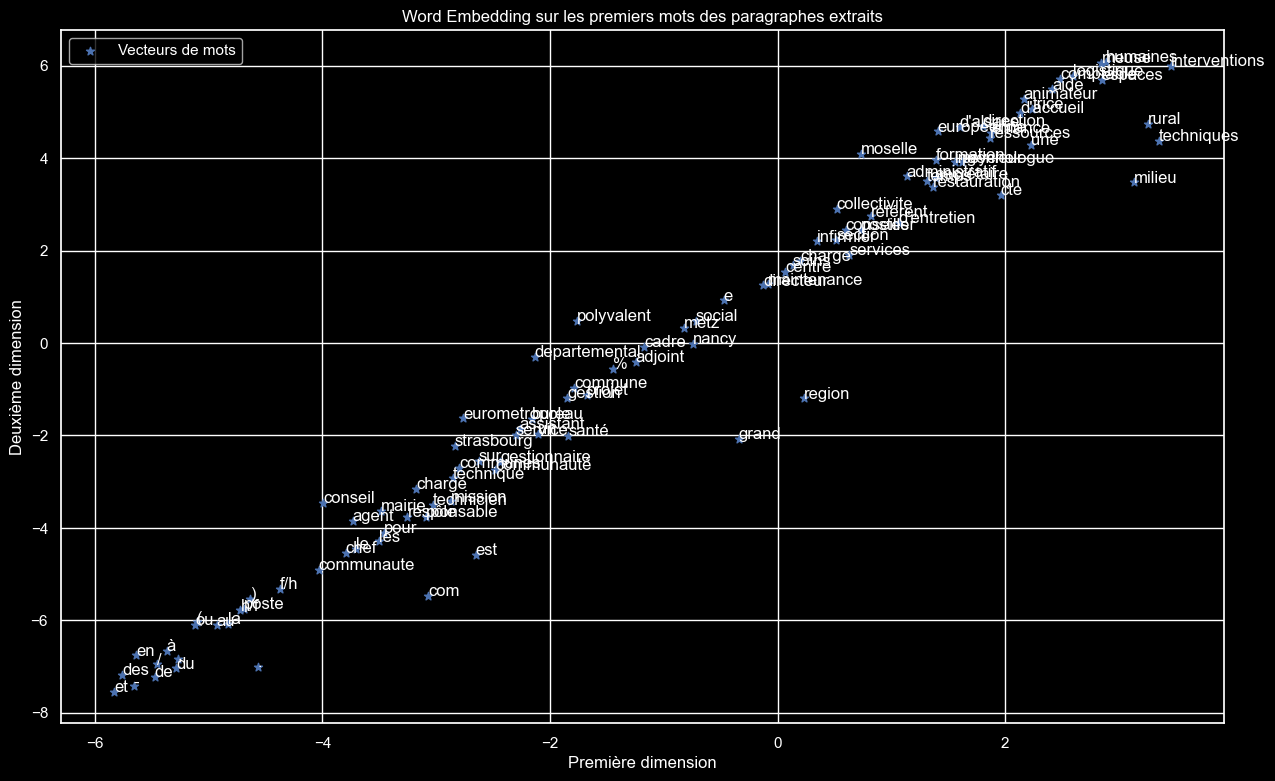

In [46]:
sns.set()
plt.style.use('dark_background')

plt.figure(figsize=(15, 9))
plt.scatter(word_vectors_2d[:, 0], word_vectors_2d[:, 1], color='b', label='Vecteurs de mots', marker='*')
plt.title('Word Embedding sur les premiers mots des paragraphes extraits')
plt.xlabel('Première dimension')
plt.ylabel('Deuxième dimension')
plt.legend()

# Annotation des mots
for i, word in enumerate(words):
    plt.annotate(word, xy=(word_vectors_2d[i, 0], word_vectors_2d[i, 1]))

plt.show()